In [1]:
!pwd

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))# デフォルトは75%

import sys
sys.executable

/c/Users/81908/jupyter_notebook/tfgpu_py36_work/02_keras_py/experiment/01_code_test


'C:\\Users\\81908\\Anaconda3\\envs\\tfgpu\\python.exe'

# tf_my_generator.pyテスト

In [2]:
# モジュールimport
import os, sys
current_dir = os.path.dirname(os.path.abspath("__file__"))
path = os.path.join(current_dir, '../../')
sys.path.append(path)
from transformer import tf_my_generator as my_generator
from transformer import tf_get_train_valid_test as get_train_valid_test
from dataset import util
%matplotlib inline
%reload_ext autoreload
%autoreload 2

out_dir = 'output_test'

In [3]:
import os, sys, glob, pathlib
import numpy as np
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator

#img_dir = r"D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_100\train"
img_dir = r"D:\work\kaggle_data\Cats_VS._Dogs\images\small_set\train"
classes = sorted([pathlib.Path(d).name for d in glob.glob(img_dir+'\*')])
display(pd.DataFrame(classes))

shape = 331,331,3
batch_size = 30

gen = ImageDataGenerator(rescale = 1./255.)
#gen = ImageDataGenerator()
gen = gen.flow_from_directory(
        img_dir,
        target_size=(shape[0], shape[1]),
        color_mode='rgb',
        classes=classes,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=True
    )

0
0  Cat
1  Dog

Found 1000 images belonging to 2 classes.


### Imagedatagenerator用label_smoothing
### ImageDataGeneratorの1batdh分画像とラベルをprintで確認する

x.shape: (30, 331, 331, 3)
x[0]:
 [[[0.74509805 0.7294118  0.7176471 ]
  [0.74509805 0.7294118  0.7176471 ]
  [0.74509805 0.7294118  0.7176471 ]
  ...
  [0.7686275  0.7490196  0.7372549 ]
  [0.7686275  0.7490196  0.7372549 ]
  [0.7686275  0.7490196  0.7372549 ]]

 [[0.74509805 0.7294118  0.7176471 ]
  [0.74509805 0.7294118  0.7176471 ]
  [0.74509805 0.7294118  0.7176471 ]
  ...
  [0.7686275  0.7490196  0.7372549 ]
  [0.7686275  0.7490196  0.7372549 ]
  [0.7686275  0.7490196  0.7372549 ]]

 [[0.74509805 0.7294118  0.7176471 ]
  [0.74509805 0.7294118  0.7176471 ]
  [0.74509805 0.7294118  0.7176471 ]
  ...
  [0.7686275  0.7490196  0.7372549 ]
  [0.7686275  0.7490196  0.7372549 ]
  [0.7686275  0.7490196  0.7372549 ]]

 ...

 [[0.73333335 0.6627451  0.5764706 ]
  [0.7294118  0.65882355 0.57254905]
  [0.7411765  0.67058825 0.58431375]
  ...
  [0.7803922  0.7411765  0.7372549 ]
  [0.7803922  0.7411765  0.7372549 ]
  [0.7803922  0.7411765  0.7372549 ]]

 [[0.7568628  0.6862745  0.6       ]
  [

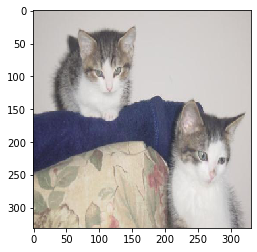

y[1]: [0.95 0.05]


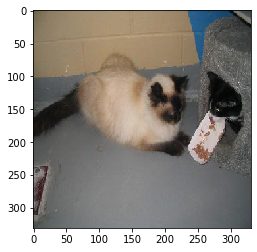

y[2]: [0.95 0.05]


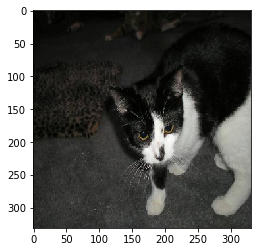

y[3]: [0.05 0.95]


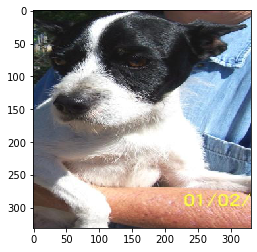

y[4]: [0.95 0.05]


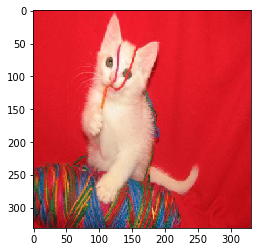

y[5]: [0.95 0.05]


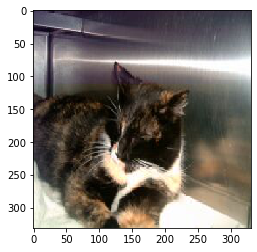

y[6]: [0.05 0.95]


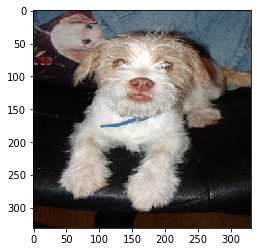

y[7]: [0.95 0.05]


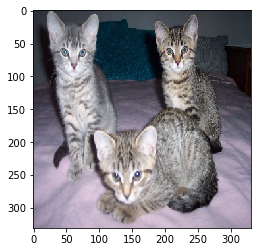

y[8]: [0.05 0.95]


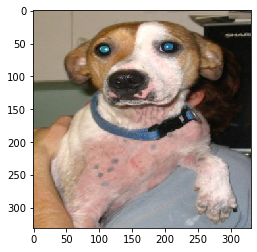

y[9]: [0.05 0.95]


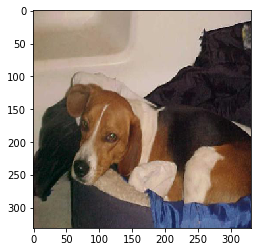

y[10]: [0.95 0.05]


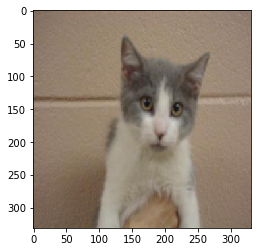

y[11]: [0.05 0.95]


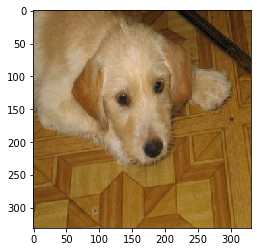

y[12]: [0.05 0.95]


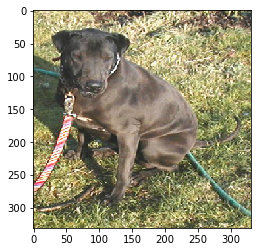

y[13]: [0.05 0.95]


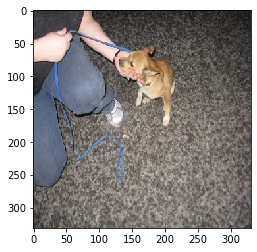

y[14]: [0.95 0.05]


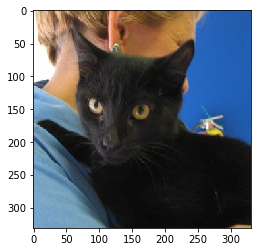

y[15]: [0.05 0.95]


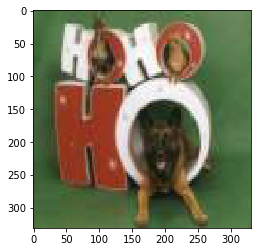

y[16]: [0.95 0.05]


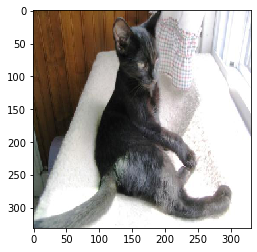

y[17]: [0.95 0.05]


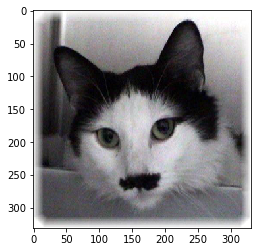

y[18]: [0.05 0.95]


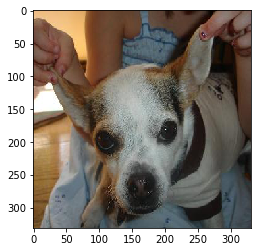

y[19]: [0.95 0.05]


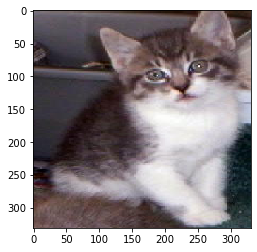

y[20]: [0.05 0.95]


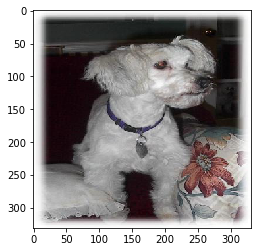

y[21]: [0.05 0.95]


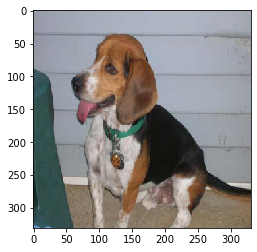

y[22]: [0.05 0.95]


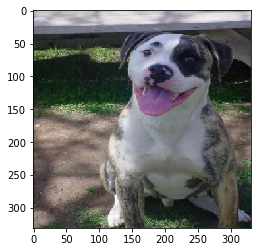

y[23]: [0.05 0.95]


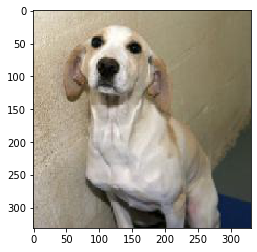

y[24]: [0.05 0.95]


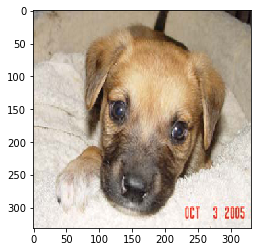

y[25]: [0.95 0.05]


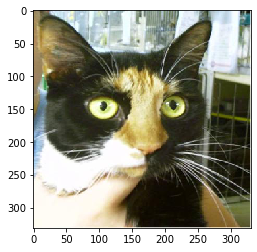

y[26]: [0.95 0.05]


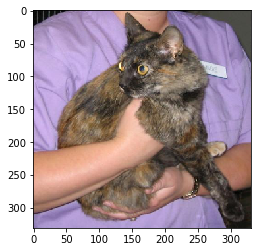

y[27]: [0.05 0.95]


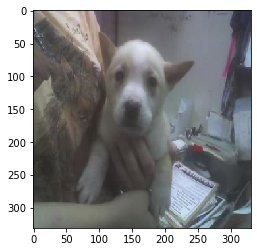

y[28]: [0.05 0.95]


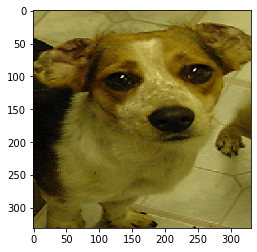

y[29]: [0.95 0.05]


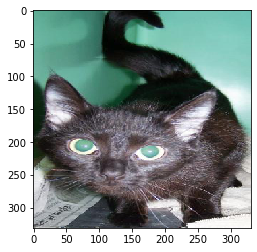

In [4]:
custom_gen = my_generator.label_smoothing_generator(gen)

my_generator.print_image_generator(custom_gen, i=0)

### grayscaleでData AugmentationするGenerator

Num_Images:  30


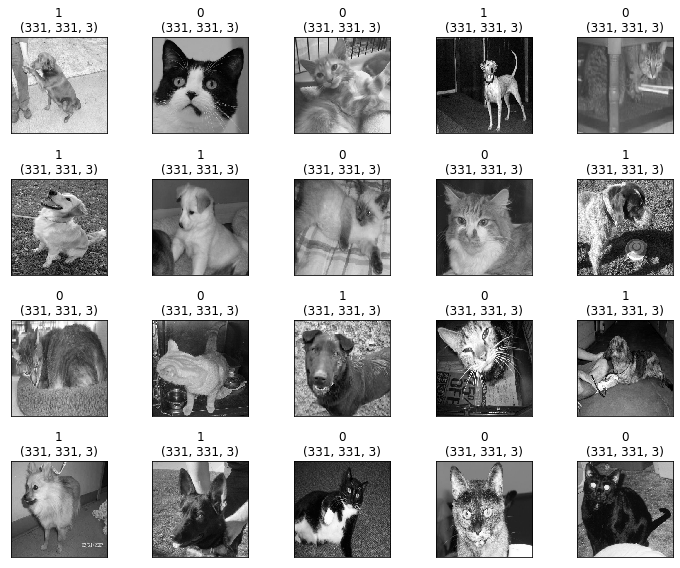

<Figure size 432x288 with 0 Axes>

In [5]:
custom_gen = my_generator.gray_generator(gen, p=1.0)

x,y = next(custom_gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

### Random cropでData AugmentationするGenerator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Num_Images:  30


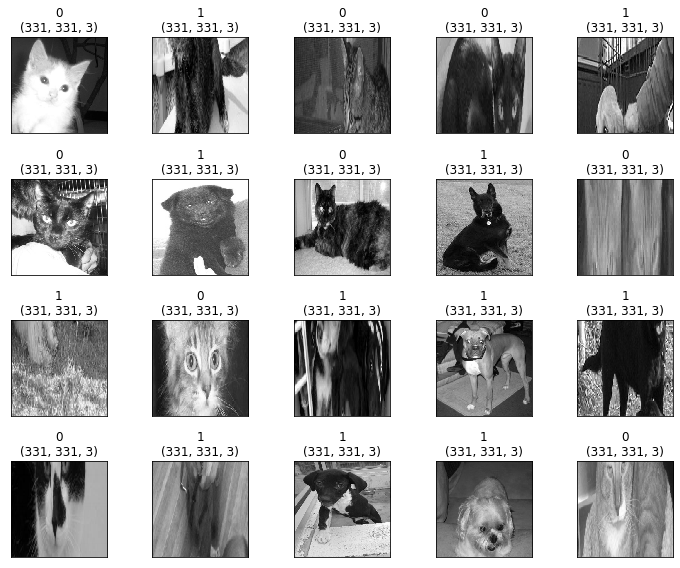

<Figure size 432x288 with 0 Axes>

In [6]:
custom_gen = my_generator.random_crop_generator(custom_gen, random_crop_size=[100,100])

x,y = next(custom_gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

### Random ErasingでData AugmentationするGenerator

Num_Images:  30


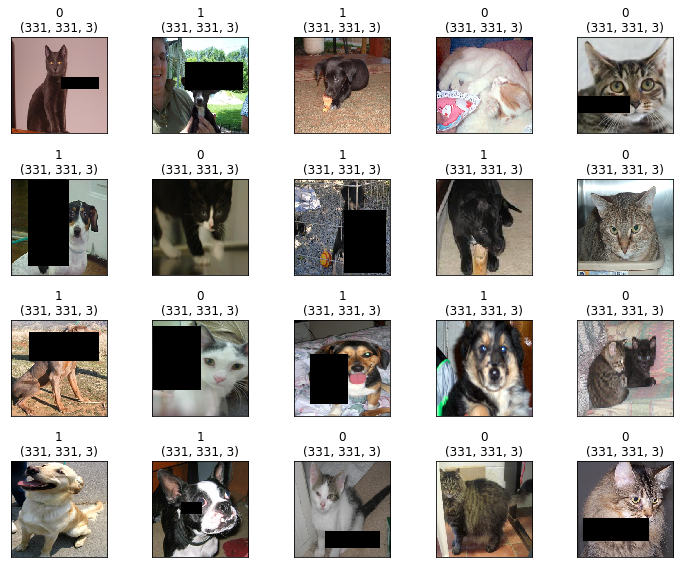

<Figure size 432x288 with 0 Axes>

In [7]:
custom_gen = my_generator.random_erasing_generator(gen, p=0.5)

x,y = next(custom_gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

### RICAPでData AugmentationするGenerator

Num_Images:  30


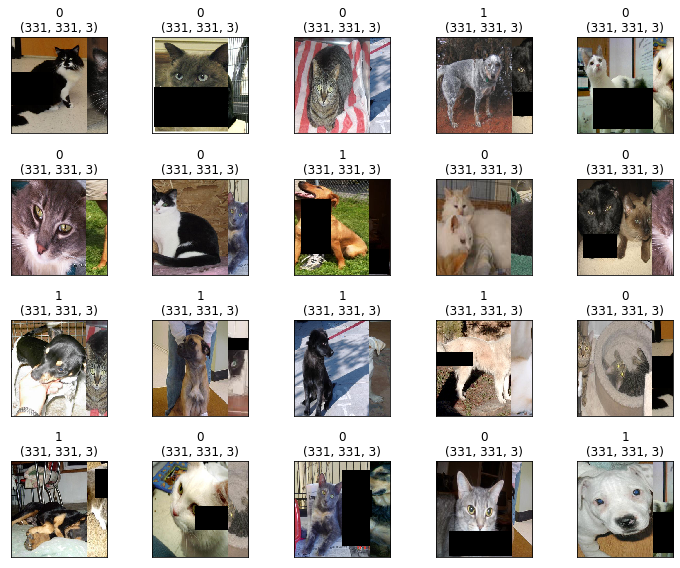

<Figure size 432x288 with 0 Axes>

In [8]:
custom_gen = my_generator.ricap_generator(custom_gen)

x,y = next(custom_gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

### MixupでData AugmentationするGenerator

Num_Images:  30


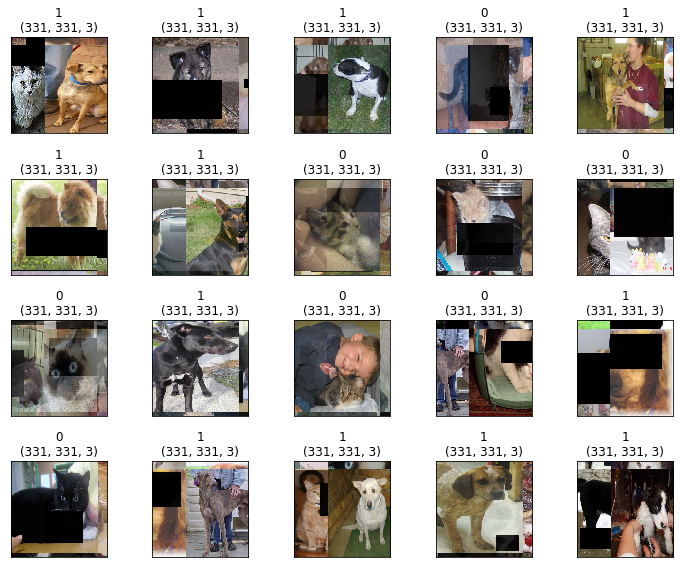

<Figure size 432x288 with 0 Axes>

In [9]:
custom_gen = my_generator.mixup_generator(custom_gen)

x,y = next(custom_gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

### Rand_AugmentでData AugmentationするGenerator

1.0
[1. 0.]
Num_Images:  30


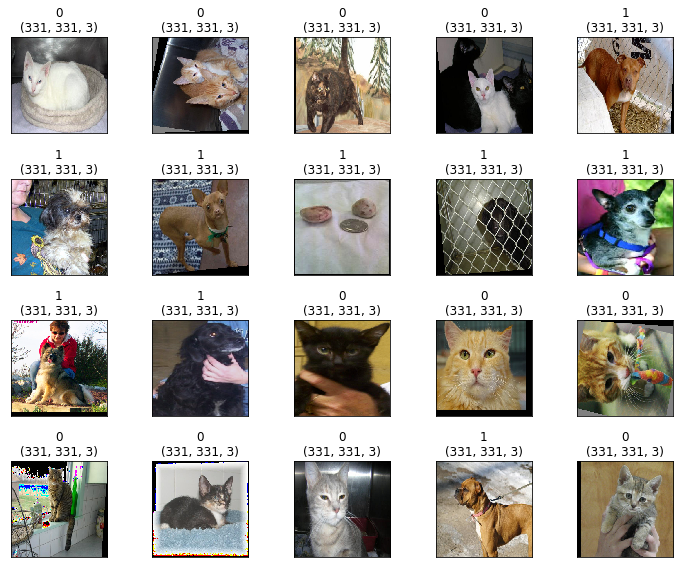

<Figure size 432x288 with 0 Axes>

In [10]:
custom_gen = my_generator.randaugment_generator(gen, N=3, M=4)

x,y = next(custom_gen)
print(np.max(x))
print(y[0])
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

### CutmixでData AugmentationするGenerator

Num_Images:  30


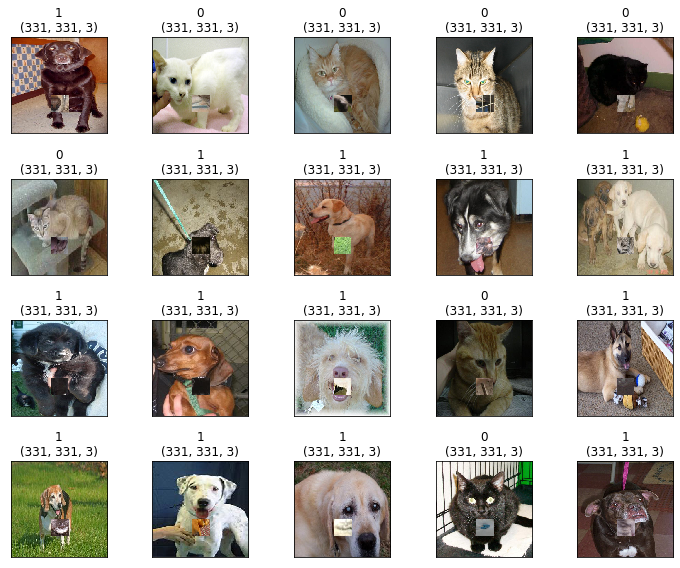

<Figure size 432x288 with 0 Axes>

In [11]:
custom_gen = my_generator.cutmix_generator(gen, cutmix_alpha=1.0)

x,y = next(custom_gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

### 下山さんがくずし字コンペでやっていたData AugmentationをするGenerator

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


255.0
[0. 1.]
Num_Images:  30


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


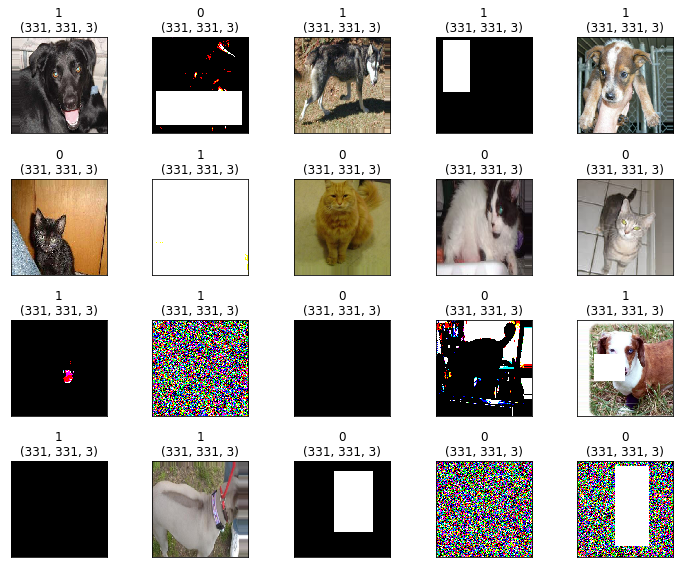

<Figure size 432x288 with 0 Axes>

In [12]:
custom_gen = my_generator.get_kuzushiji_generator(gen)

x,y = next(custom_gen)
print(np.max(x))
print(y[0])
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

### MyImageDataGeneratorクラス確認

Found 1000 images belonging to 2 classes.
1.0
[1. 0.]
Num_Images:  30


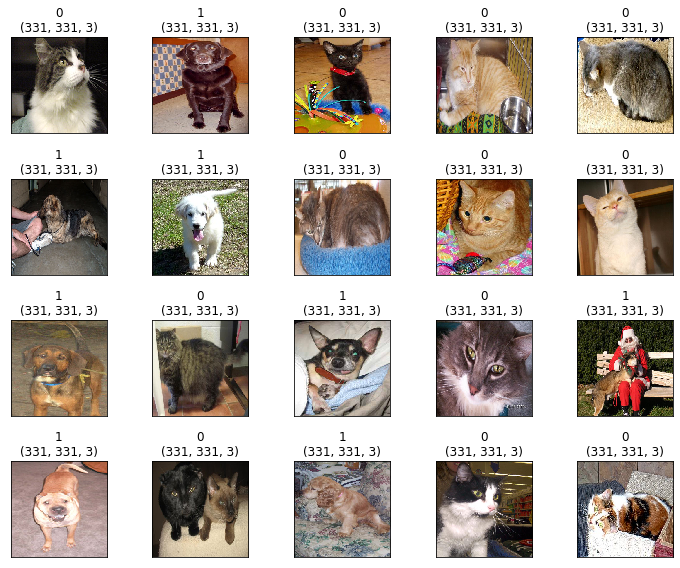

<Figure size 432x288 with 0 Axes>

In [13]:
my_IDG_options = {'rescale':1.0/255.0}
custom_gen = my_generator.MyImageDataGenerator(**my_IDG_options)

custom_gen = custom_gen.flow_from_directory(
        img_dir,
        target_size=(shape[0], shape[1]),
        color_mode='rgb',
        classes=classes,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=True
    )

x,y = next(custom_gen)
print(np.max(x))
print(y[0])
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

Found 1000 images belonging to 2 classes.
1.0
[1. 0.]
Num_Images:  30


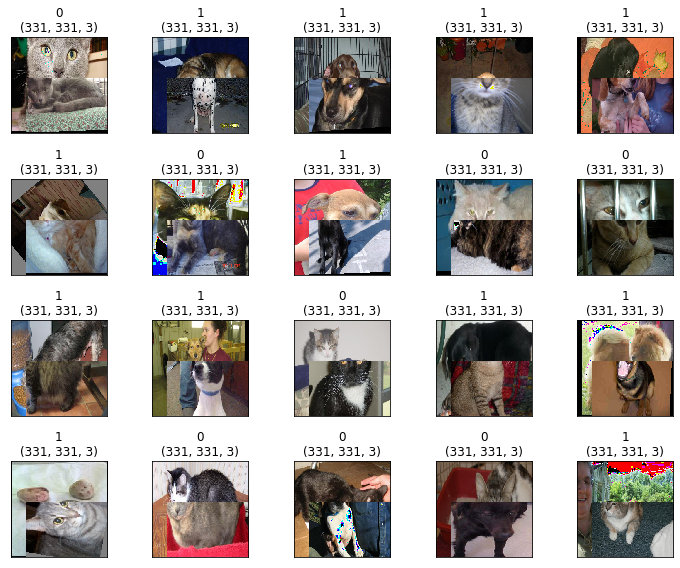

<Figure size 432x288 with 0 Axes>

In [14]:
my_IDG_options = {'rescale':1.0/255.0,
                  # 'is_kuzushiji_gen':True,
                  # 'grayscale_prob':0.5,
                  # 'random_crop':[24,112],
                  # 'random_erasing_prob':0.5,
                  # 'mix_up_alpha':0.2,
                  # 'ricap_beta':0.3,
                  'randaugment_N':2,
                  'randaugment_M':3,
                  'cutmix_alpha':1.0
                 }
custom_gen = my_generator.MyImageDataGenerator(**my_IDG_options)

custom_gen = custom_gen.flow_from_directory(
        img_dir,
        target_size=(shape[0], shape[1]),
        color_mode='rgb',
        classes=classes,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=True
    )

x,y = next(custom_gen)
print(np.max(x))
print(y[0])
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

### ミニバッチでunder samplingするGenerator

500
Num_Images:  100


C:\Users\81908\jupyter_notebook\tfgpu_py36_work\02_keras_py\experiment\01_code_test\../..\transformer\tf_my_generator.py:675: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  major_label = label_counts.argmax()


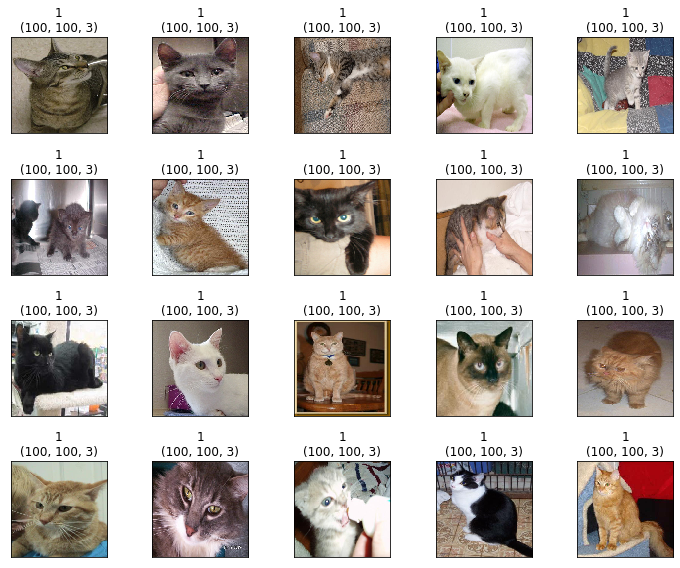

Num_Images:  100


<Figure size 432x288 with 0 Axes>

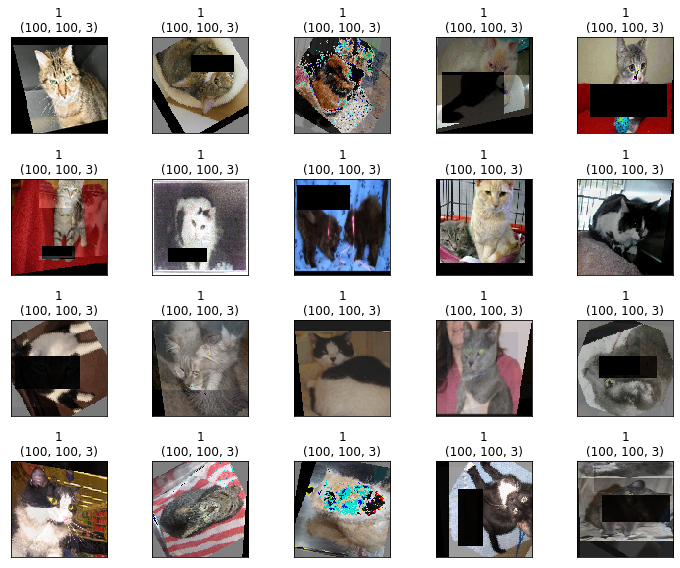

<Figure size 432x288 with 0 Axes>

In [15]:
data_dir = r'D:\work\kaggle_data\Cats_VS._Dogs\images\small_set\train\Cat'
img_paths = glob.glob(data_dir+'/*jpg')
img_names = img_paths
shape = [100, 100, 3]
n_samples=50
print(len(img_paths))

x = np.array(img_names)
# ラベル不均衡にする
y = np.array([0]*80 + [1]*(x.shape[0]-80))
#y = np.array([0]*10 + [1]*(x.shape[0]-40) + [2]*30)
enc, y = get_train_valid_test.label2onehot(y)

# ミニバッチでunder samplingするGenerator
gen = my_generator.get_load_image_balanced_generator(x, y, n_samples=n_samples, shape=shape)
x,y = next(gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

# 別Generatorと組み合わせる
custom_gen = my_generator.randaugment_generator(gen, N=6, M=8)
custom_gen = my_generator.random_erasing_generator(custom_gen)
custom_gen = my_generator.mixup_generator(custom_gen)
x,y = next(custom_gen)
util.plot_5imgs(x, plot_num=20, labels=[np.argmax(_y) for _y in y])

#### trainためす  
※jupyterではカーネル再起動しないとkerasのfit_generator()実行できない。  
fit_generator()連続で実行するとthread系のエラーで学習失敗する。。。

In [16]:
# モジュールimport
import os, sys
current_dir = os.path.dirname(os.path.abspath("__file__"))
path = os.path.join(current_dir, '../../')
sys.path.append(path)
from transformer import tf_my_generator as my_generator
from transformer import tf_get_train_valid_test as get_train_valid_test
from dataset import util
%matplotlib inline
%reload_ext autoreload
%autoreload 2

out_dir = 'output_test'


import os, sys, glob, pathlib
import numpy as np
import pandas as pd
from keras_preprocessing.image import ImageDataGenerator

#img_dir = r"D:\work\keras_iPhone_pictures\InceptionResNetV2_small_set\train_100\train"
img_dir = r"D:\work\kaggle_data\Cats_VS._Dogs\images\small_set\test"
classes = sorted([pathlib.Path(d).name for d in glob.glob(img_dir+'\*')])
display(pd.DataFrame(classes))

shape = 100,100,3
batch_size = 8

my_IDG_options = {'rescale':1.0/255.0, 
                  #'ricap_beta':0.3, 
                  'cutmix_alpha':0.5,
                  'randaugment_N':14, 
                  'randaugment_M':9}
custom_gen = my_generator.MyImageDataGenerator(**my_IDG_options)
custom_gen = custom_gen.flow_from_directory(
        img_dir,
        target_size=(shape[0], shape[1]),
        color_mode='rgb',
        classes=classes,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=True
    )

valid_gen = ImageDataGenerator(rescale = 1./255.)
valid_gen = valid_gen.flow_from_directory(
        img_dir,
        target_size=(shape[0], shape[1]),
        color_mode='rgb',
        classes=classes,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=True
    )

from model import tf_define_model as define_model
from model import tf_my_callback as my_callback
from model import tf_lr_finder as lr_finder
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
keras.backend.clear_session()

loss = 'categorical_crossentropy'
metrics = ['accuracy']
activation = 'softmax'
choice_model, trainable = 'VGG16', 15
choice_optim = 'sgd'
model_path = None
classes = ['Cat', 'Dog']
num_epoch = 3

# model
model, orig_model = define_model.get_fine_tuning_model(out_dir, shape[0], shape[1], shape[2]
                                                           , len(classes)
                                                           , choice_model
                                                           , trainable
                                                           , activation=activation)
optim = define_model.get_optimizers(choice_optim)
model.compile(loss=loss, optimizer=optim, metrics=metrics)

history = model.fit_generator(
    custom_gen
    , steps_per_epoch = 200//batch_size
    , epochs = num_epoch
    , validation_data = valid_gen
    , validation_steps = 200//batch_size
    , verbose = 1 # 1:ログをプログレスバーで標準出力 2:最低限の情報のみ出す
    , workers = 1, use_multiprocessing = False
    )

0
0  Cat
1  Dog

Found 200 images belonging to 2 classes.
----- model_param -----
output_dir = output_test
img_rows img_cols channels = 100 100 3
num_classes = 2
choice_model trainable = VGG16 15
fcs = []
fcpool = GlobalAveragePooling2D
pred_kernel_initializer pred_l2_rate = zeros 0.0001
activation = softmax
gpu_count = 1
skip_bn = True
n_multitask = 1
----- FC_layers -----
---- choice_optim = sgd ----
sgd_lr sgd_momentum sgd_decay sgd_nesterov = 0.01 0.9 0.0 True
Instructions for updating:
Please use Model.fit, which supports generators.
Found 200 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 25 steps, validate for 25 steps
Epoch 1/3
25/25 [==============================] - 4s 171ms/step - loss: 0.7362 - accuracy: 0.5250 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 2/3
25/25 [==============================] - 2s 68ms/step - loss: 0.7001 - accuracy: 0.4900 - val_loss: 0.6545 - val_accuracy: 0.7250
Epoch 3/3
25/25 [==============================] - 2s 70ms